In [104]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.options.display.float_format='{:,.2f}'.format # to round all number to 0.2
import plotly.express as px

# Dataset contains the unemployment rate of all the states in India



### **Dataset Description**

- **Region**: Represents the states in India where the data was collected.
- **Date**: The specific date on which the unemployment rate was observed.
- **Frequency**: The measurement frequency, which in this case is monthly.
- **Estimated Unemployment Rate (%)**: The percentage of people who are unemployed in each state of India.
- **Estimated Employed (%)**: The percentage of people who are employed in each state of India.
- **Estimated Labour Participation Rate (%)**: The percentage of the eligible population actively participating in the labor force, calculated by dividing the number of people in the labor force by the total number of eligible participants.



In [105]:
data=pd.read_csv('F://projects_inteeern//1//Unemployment in India.csv',)
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,"11,999,139.00",43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,"11,755,881.00",42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,"12,086,707.00",43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,"12,285,693.00",43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,"12,256,762.00",44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration

In [106]:
data.head( )

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,"11,999,139.00",43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,"11,755,881.00",42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,"12,086,707.00",43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,"12,285,693.00",43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,"12,256,762.00",44.68,Rural


In [107]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
data.sample()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
679,Tamil Nadu,29-02-2020,Monthly,3.31,"11,742,101.00",37.48,Urban


In [109]:
print(data.shape[0])
print(data.shape[1])

768
7


In [ ]:
data.info()

In [110]:
print(data.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


# Cleaning_Data

In [111]:
data.columns=data.columns.str.strip( )
print(data.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [112]:
num_duplicated_rows = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicated_rows}")


Number of duplicated rows: 27


In [ ]:
data.isna().sum()

In [113]:
data.dropna(inplace=True,)

In [114]:
data.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [ ]:
duplicated_rows=data.duplicated()
print(data[duplicated_rows])

In [ ]:
num_duplicated_rows = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicated_rows}")


In [115]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.00,740.00,740.00
mean,11.79,"7,204,460.03",42.63
std,10.72,"8,087,988.43",8.11
min,0.00,"49,420.00",13.33
25%,4.66,"1,190,404.50",38.06
50%,8.35,"4,744,178.50",41.16
75%,15.89,"11,275,489.50",45.51
max,76.74,"45,777,509.00",72.57


# 2. Descriptive Analysis & Visualization

 1- Univariate analysis

In [116]:
region_plot=px.bar(data.Region.value_counts(),title='Distribution of Regions',text_auto=True ,labels={'Region':'Region','value':'Frequency'})
region_plot.update_layout(xaxis={'categoryorder':'total descending'})
region_plot.update_traces(marker_color='rgb(350,200,600)',marker_line_color='rgb(10,20,6)',textposition='outside',
                         marker_line_width=1.5,opacity=1)

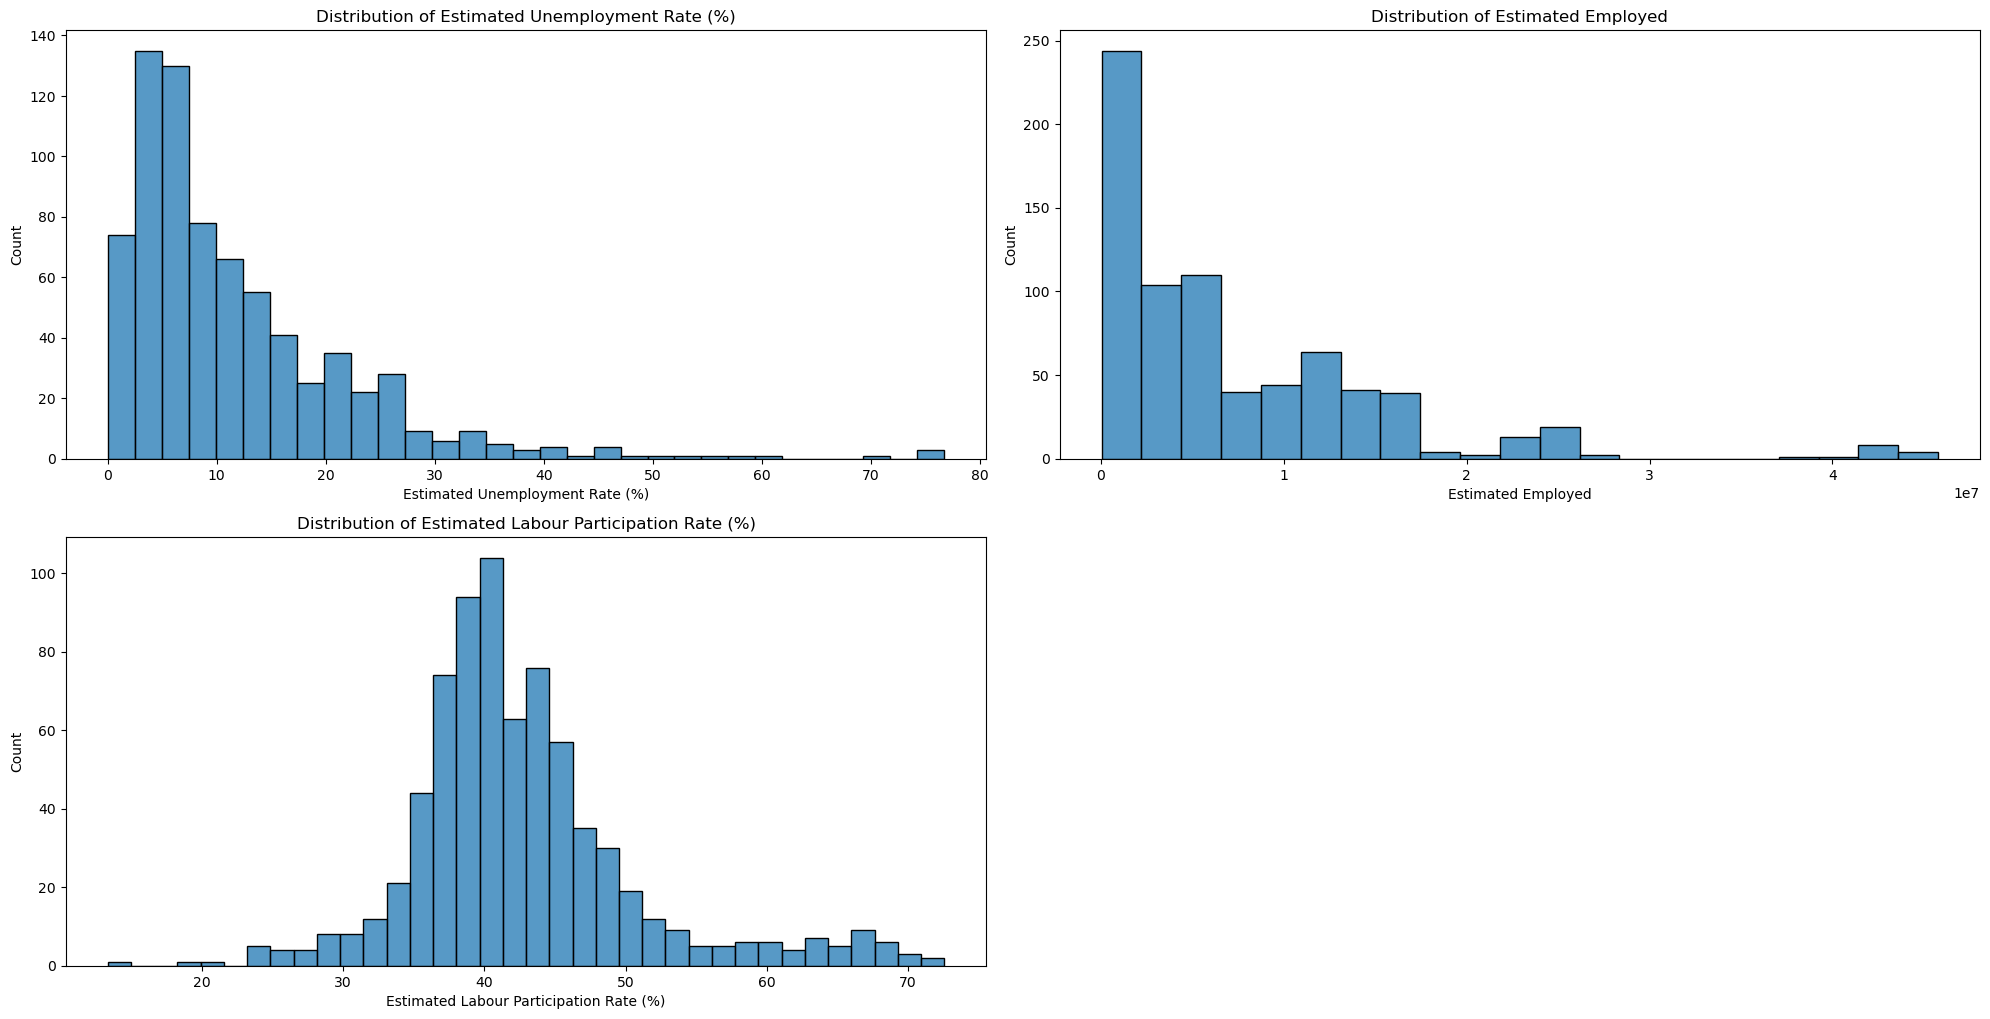

In [117]:
numeric_columns=data.select_dtypes('number')
plt.figure(figsize=(20,20))
for i , col in enumerate(numeric_columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data[col])
    plt.title('Distribution of '+col)
    plt.tight_layout()

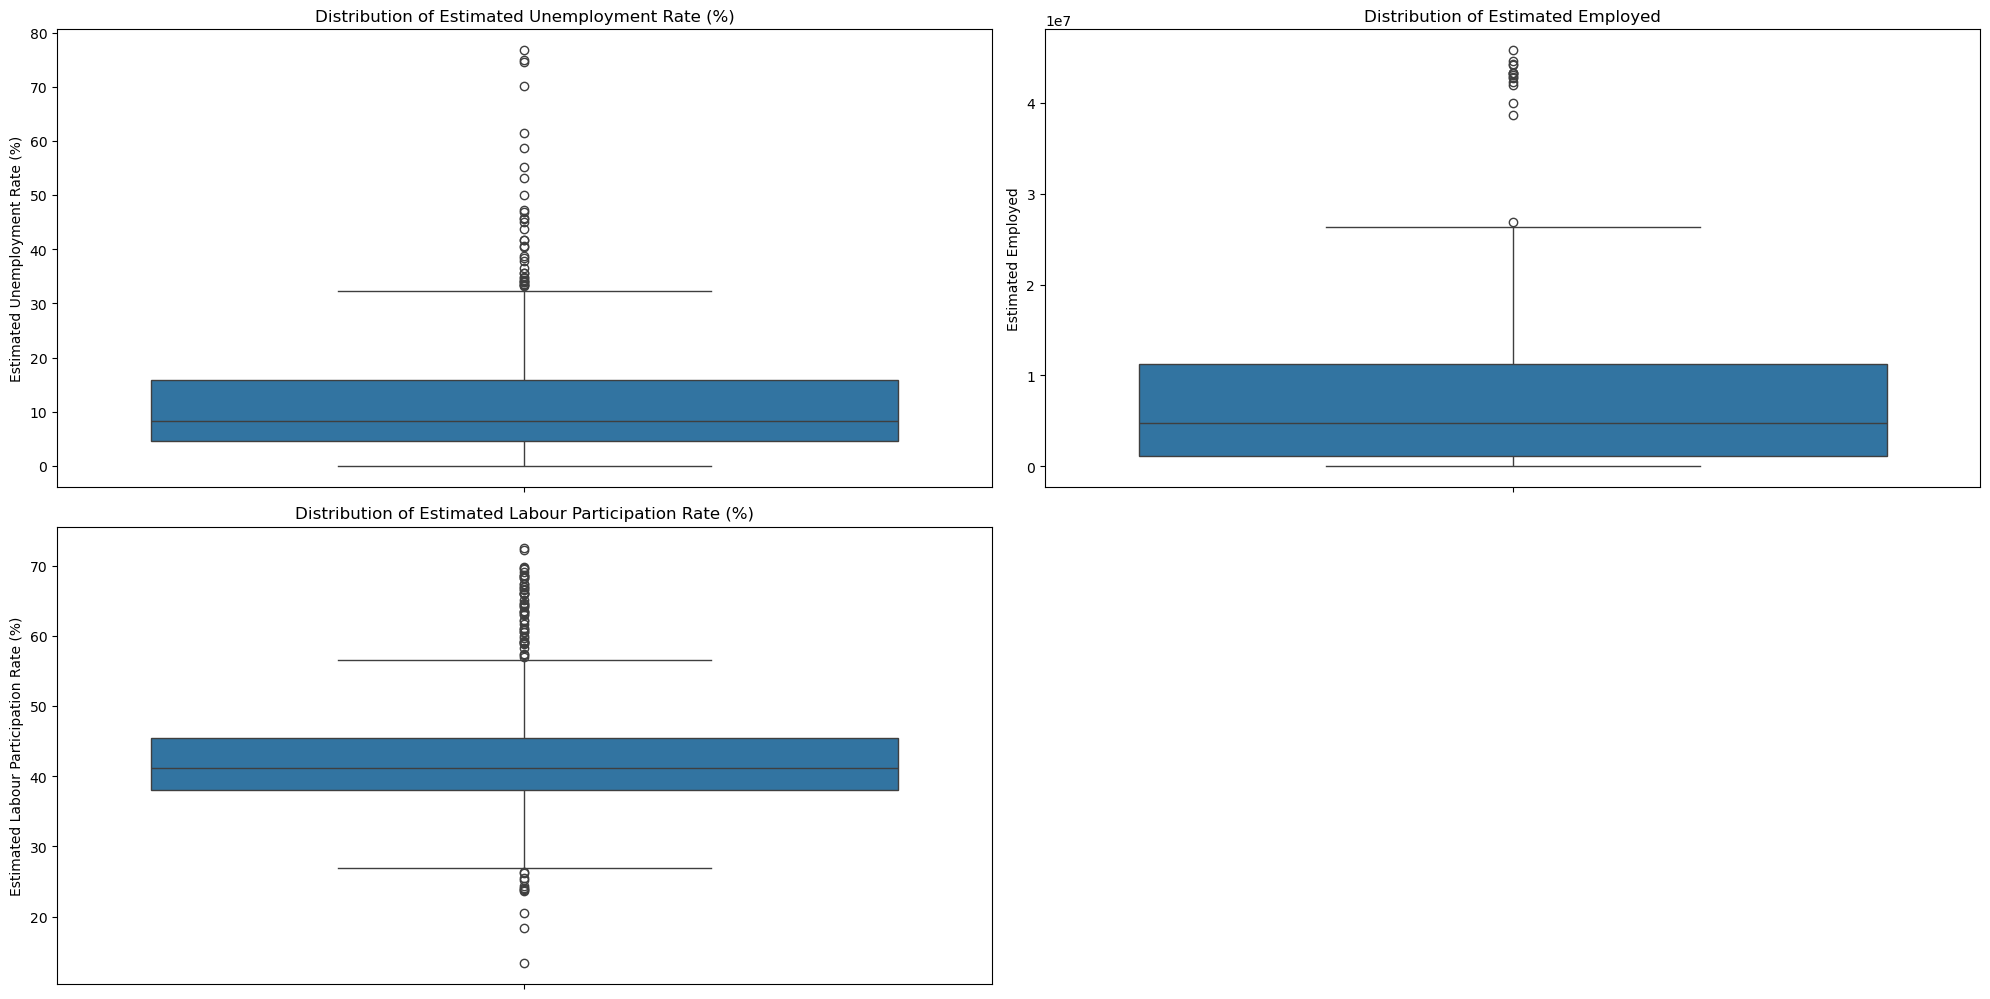

In [119]:
numeric_columns=data.select_dtypes('number')
plt.figure(figsize=(20,20))
for i , col in enumerate(numeric_columns):
    plt.subplot(4,2,i+1)
    sns.boxplot(data[col])
    plt.title('Distribution of '+col)
    plt.tight_layout()

2- Bivariate Analysis

In [74]:
# Group by Region and calculate the total Estimated Employed for each region
region_employment = data.groupby('Region')['Estimated Employed'].sum()

#  proportion of Estimated Employed for each region
region_employment_proportion = region_employment / region_employment.sum()
region_employment_proportion = region_employment_proportion.reset_index()

region_employment_proportion.columns = ['Region', 'Proportion of Estimated Employed']
print(region_employment_proportion.sort_values(by='Proportion of Estimated Employed',ascending=False))


#  pie chart for the proportion of estimated employment by region
fig = px.pie(data_frame=region_employment_proportion, 
             names='Region', 
             values='Proportion of Estimated Employed', 
             title='Proportion of Estimated Employed by Region')

fig.show()


              Region  Proportion of Estimated Employed
25     Uttar Pradesh                              0.15
15       Maharashtra                              0.10
27       West Bengal                              0.09
2              Bihar                              0.06
22        Tamil Nadu                              0.06
7            Gujarat                              0.06
14    Madhya Pradesh                              0.06
12         Karnataka                              0.06
20         Rajasthan                              0.05
0     Andhra Pradesh                              0.04
23         Telangana                              0.04
17            Odisha                              0.03
1              Assam                              0.03
19            Punjab                              0.02
11         Jharkhand                              0.02
13            Kerala                              0.02
4       Chhattisgarh                              0.02
8         

 Uttar Pradesh is Largest region  for Estimated Employed

In [75]:
Date_Estimated=data[['Date','Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']]
Date_Estimated['Date']=pd.to_datetime(Date_Estimated['Date'],dayfirst=True)
Date_Estimated=Date_Estimated.set_index('Date')
Date_Estimated=Date_Estimated.resample(rule='ME').agg({'Estimated Unemployment Rate (%)':'mean','Estimated Employed':'mean','Estimated Labour Participation Rate (%)':'mean'})
# i should use  resample in time series it equal to groupby in df
Date_Estimated.head()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18064\2108506545.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Date,,,
2019-05-31,8.87,"7,410,148.44",43.90
2019-06-30,9.30,"7,358,641.57",43.75
2019-07-31,9.03,"7,404,425.31",43.71
2019-08-31,9.64,"7,539,815.19",43.65
2019-09-30,9.05,"7,739,463.96",44.30


In [76]:
px.line(data_frame=Date_Estimated,y='Estimated Employed',title='Mean employment Rate Over Time')

employment is  decreased during the Corona period from Mar 2020

In [57]:
px.line(data_frame=Date_Estimated,y='Estimated Unemployment Rate (%)',title='Mean Unemployment Rate Over Time')


unemployment is  increased during the Corona period from Mar 2020

In [58]:
px.line(data_frame=Date_Estimated,y='Estimated Labour Participation Rate (%)',title='Mean Labour Participation Rate Over Time')


Labour Participation Rate is  decreased during May 2020

In [33]:
plot=px.bar(data,x='Region',y='Estimated Unemployment Rate (%)',title='Bar plot of region with estimated unemployment rate',color='Region')
plot.update_layout(xaxis = {'categoryorder':'total descending'})
plot.show()

In [77]:
grouped_data = data.groupby(['Date', 'Region'])['Estimated Unemployment Rate (%)'].mean().reset_index()
print(grouped_data)


          Date          Region  Estimated Unemployment Rate (%)
0   2019-05-31  Andhra Pradesh                             4.87
1   2019-05-31           Assam                             6.08
2   2019-05-31           Bihar                            14.58
3   2019-05-31      Chandigarh                            18.35
4   2019-05-31    Chhattisgarh                             9.79
..         ...             ...                              ...
380 2020-06-30       Telangana                            13.11
381 2020-06-30         Tripura                            23.16
382 2020-06-30   Uttar Pradesh                            10.78
383 2020-06-30     Uttarakhand                             7.90
384 2020-06-30     West Bengal                             7.40

[385 rows x 3 columns]


                                       Here is a Conclusion of unemployment plot

In [78]:
avg_unemployment_rate=data.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

Region_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()

Region_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()

print(f"Region_with_highest_unemployment : {Region_with_highest_unemployment}")
print(f'high_unemployment_rate : {high_unemployment_rate}')
print(f"Region_with_lowest_unemployment : {Region_with_lowest_unemployment}")
print(f'low_unemploy_rate : {low_unemploy_rate}')

Region_with_highest_unemployment : Tripura
high_unemployment_rate : 28.350357142857142
Region_with_lowest_unemployment : Meghalaya
low_unemploy_rate : 4.7988888888888885


In [79]:
plot=px.bar(data,x='Region',y='Estimated Employed',title='Bar plot of region with estimated employment rate',color='Region')
plot.update_layout(xaxis = {'categoryorder':'total descending'})
plot.show()

                                       Here is a Conclusion of employment plot

In [80]:
avg_employment_rate=data.groupby('Region')['Estimated Employed'].mean()
Region_with_highest_employment=avg_employment_rate.idxmax()
high_employment_rate=avg_employment_rate.max()
Region_with_lowest_employment=avg_employment_rate.idxmin()
low_employ_rate=avg_employment_rate.min()
print(f"Region_with_highest_employment : {Region_with_highest_employment}")
print(f'high_employment_rate : {high_unemployment_rate}')
print(f"Region_with_lowest_employment : {Region_with_lowest_employment}")
print(f'low_employ_rate : {low_employ_rate}')

Region_with_highest_employment : Uttar Pradesh
high_employment_rate : 28.350357142857142
Region_with_lowest_employment : Sikkim
low_employ_rate : 106880.70588235294


In [81]:

fig = px.scatter(data, 
                 y='Estimated Labour Participation Rate (%)', 
                 x='Region', 
                 title='Labour Participation Rate by Region',
                 labels={'Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate (%)', 
                         'Region': 'Region'})
fig.update_layout(xaxis = {'categoryorder':'total descending'})

# Show the plot
fig.show()


                            Here is a Conclusion of  Labour Participation plot

In [82]:
avg_Labour_rate=data.groupby('Region')['Estimated Labour Participation Rate (%)'].mean()
Region_with_highest_employment=avg_Labour_rate.idxmax()
high_employment_rate=avg_Labour_rate.max()
Region_with_lowest_employment=avg_Labour_rate.idxmin()
low_employ_rate=avg_Labour_rate.min()
print(f"Region_with_highest_employment : {Region_with_highest_employment}")
print(f'high_employment_rate : {high_unemployment_rate}')
print(f"Region_with_lowest_employment : {Region_with_lowest_employment}")
print(f'low_employ_rate : {low_employ_rate}')

Region_with_highest_employment : Tripura
high_employment_rate : 28.350357142857142
Region_with_lowest_employment : Uttarakhand
low_employ_rate : 33.775555555555556


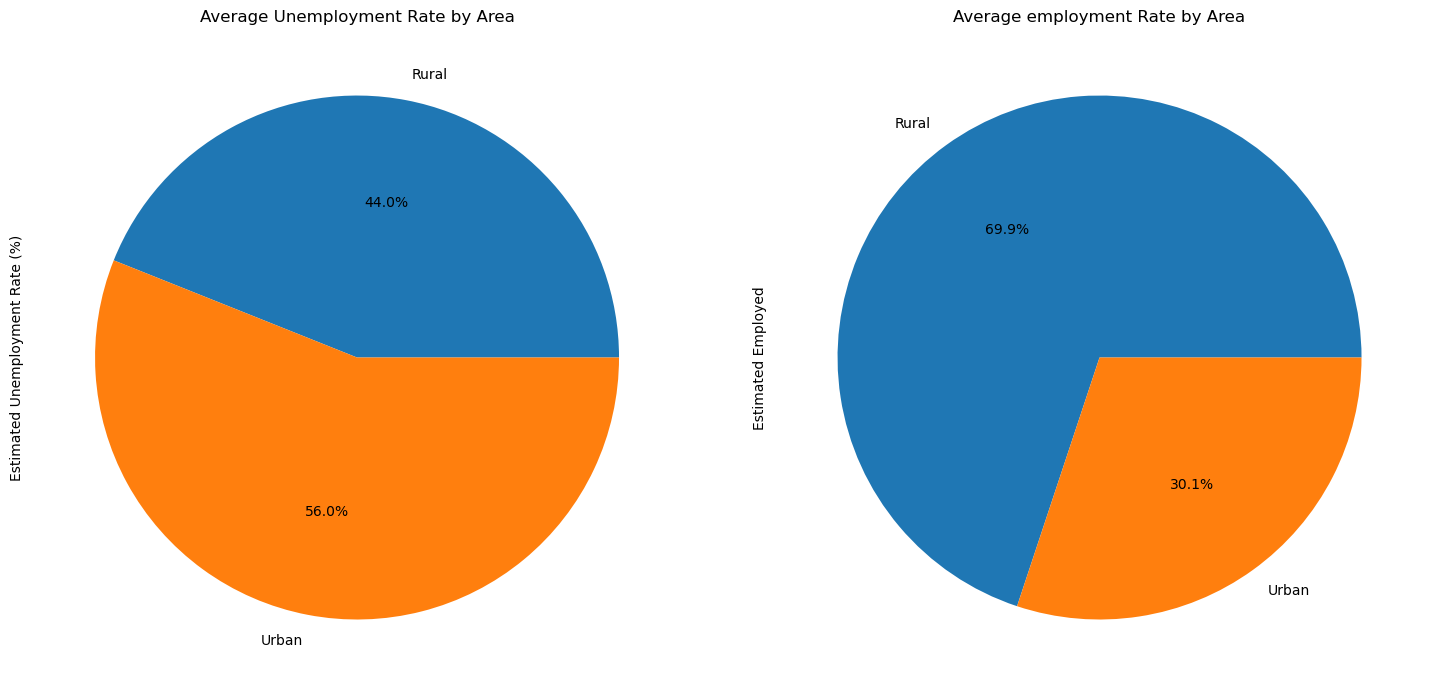

Largest percentage in Average Unemployment Rate pie chart:
Area: Urban | Percentage: 13.2%
----------------------------------------------------------------------------
Largest percentage in Average Number of Employed pie chart:
Area: Rural | Percentage: 10192852.6%


In [83]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
#Largest percentage in Average Unemployment Rate pie chart
unemployment_avg_rate=data.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
unemployment_pie=unemployment_avg_rate.plot(kind='pie',autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Average Unemployment Rate by Area')
largest_unemployment_area=unemployment_avg_rate.idxmax()
largest_unemployment_percentage=unemployment_avg_rate.max()
#Largest percentage in Average Number of Employed pie chart:
employment_avg_rate=data.groupby('Area')['Estimated Employed'].mean()
employment_pie=employment_avg_rate.plot(kind='pie',autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('Average employment Rate by Area')
largest_employment_area=employment_avg_rate.idxmax()
largest_employment_percentage=employment_avg_rate.max()
# Show the plot
plt.tight_layout()
plt.show()
#print resault
print("Largest percentage in Average Unemployment Rate pie chart:")
print(f"Area: {largest_unemployment_area} | Percentage: {largest_unemployment_percentage:.1f}%")

print('----------------------------------------------------------------------------')

print("Largest percentage in Average Number of Employed pie chart:")
print(f"Area: {largest_employment_area} | Percentage: {largest_employment_percentage:.1f}%")

3- Multivariate Analysis

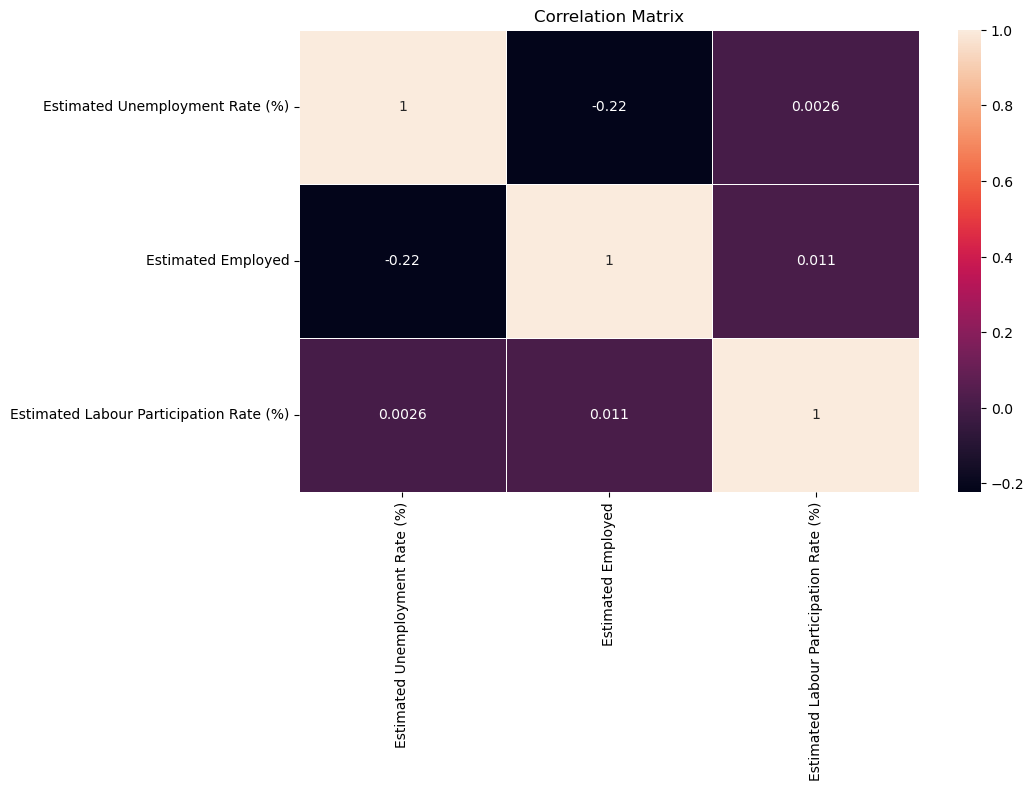

In [84]:
plt.figure(figsize=(10,6))
corr=data[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr,annot=True,linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


| Correlation coefficient | Correlation strength | Correlation type |
|:-------------------------|:----------------------|:------------------|
| -0.7 to -1              | Very strong          | Negative         |
| -0.5 to -0.7            | Strong               | Negative         |
| -0.3 to -0.5            | Moderate             | Negative         |
| 0 to -0.3               | Weak                 | Negative         |
| 0                       | None                 | Zero             |
| 0 to 0.3                | Weak                 | Positive         |
| 0.3 to 0.5              | Moderate             | Positive         |
| 0.5 to 0.7              | Strong               | Positive         |
| 0.7 to 1                | Very strong          | Positive         |

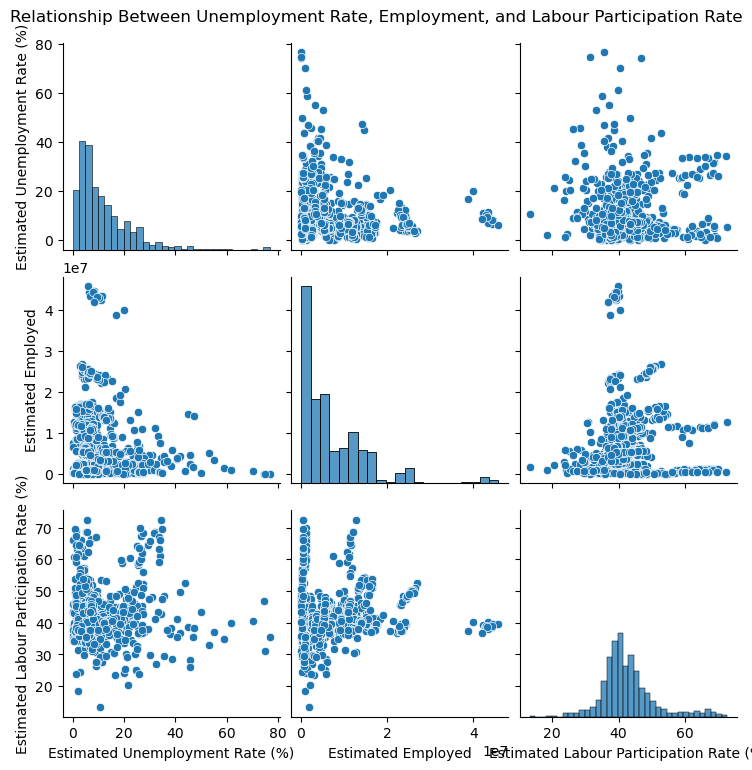

In [44]:
'''2-Employment and Labour Participation Rate: Analyze the relationship between the unemployment rate, estimated employment, and labour participation rate.'''
sns.pairplot(data[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']])
plt.suptitle('Relationship Between Unemployment Rate, Employment, and Labour Participation Rate', y=1.02)
plt.show()

unemployment rate over time for each state

In [68]:
'''Unemployment Rate Over Time: Plot the unemployment rate over time for each state to see how it changes'''
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)
data['YearMonth'] = data['Date'].dt.to_period('M')
plot=px.bar(data,x='Date',y='Estimated Unemployment Rate (%)',color='Region',title='unemployment rate over time for each state')
plot.show()

employment rate over time for each state

In [46]:
data['Date'] = pd.to_datetime(data['Date'])
data['YearMonth'] = data['Date'].dt.to_period('M')
plot=px.bar(data,x='Date',y='Estimated Employed',color='Region',title='employment rate over time for each state')
plot.show()


Regions with the highest & Lowest unemployment rate for each month

In [69]:
max=data.groupby('YearMonth')['Estimated Unemployment Rate (%)'].max().sort_values(ascending=False).reset_index()
min=data.groupby('YearMonth')['Estimated Unemployment Rate (%)'].min().sort_values(ascending=True).reset_index()
max_unemployment = max.merge(data, on=['YearMonth', 'Estimated Unemployment Rate (%)'])
min_unemployment = min.merge(data, on=['YearMonth', 'Estimated Unemployment Rate (%)'])
print("Regions with the highest unemployment rate for each month:")
print(max_unemployment)
print('----------------------------------------------------------------------------')
print("\nRegions with the lowest unemployment rate for each month:")
print(min_unemployment)

Regions with the highest unemployment rate for each month:
   YearMonth  Estimated Unemployment Rate (%)            Region       Date  \
0    2020-04                            76.74        Puducherry 2020-04-30   
1    2020-05                            75.00        Puducherry 2020-05-31   
2    2020-06                            35.57           Haryana 2020-06-30   
3    2019-05                            34.69           Tripura 2019-05-31   
4    2020-01                            34.37           Tripura 2020-01-31   
5    2020-02                            33.88           Tripura 2020-02-29   
6    2019-09                            33.57           Tripura 2019-09-30   
7    2019-12                            33.48           Tripura 2019-12-31   
8    2019-08                            33.45           Tripura 2019-08-31   
9    2020-03                            31.61           Tripura 2020-03-31   
10   2019-10                            27.54           Tripura 2019-10-31   
11   

Regions with the highest & Lowest employment rate for each month

In [70]:
max=data.groupby('YearMonth')['Estimated Employed'].max().sort_values(ascending=False).reset_index()
min=data.groupby('YearMonth')['Estimated Employed'].min().sort_values(ascending=True).reset_index()
max_unemployment = max.merge(data, on=['YearMonth', 'Estimated Employed'])
min_unemployment = min.merge(data, on=['YearMonth', 'Estimated Employed'])
print("Regions with the highest  Employed rate for each month:")
print(max_unemployment)
print('----------------------------------------------------------------------------')
print("\nRegions with the lowest  Employed rate for each month:")
print(min_unemployment)

Regions with the highest  Employed rate for each month:
   YearMonth  Estimated Employed         Region       Date Frequency  \
0    2020-01       45,777,509.00  Uttar Pradesh 2020-01-31   Monthly   
1    2019-12       44,640,087.00  Uttar Pradesh 2019-12-31   Monthly   
2    2020-02       44,257,432.00  Uttar Pradesh 2020-02-29   Monthly   
3    2019-09       44,198,762.00  Uttar Pradesh 2019-09-30   Monthly   
4    2019-08       43,298,746.00  Uttar Pradesh 2019-08-31   Monthly   
5    2019-05       43,287,808.00  Uttar Pradesh 2019-05-31   Monthly   
6    2019-11       43,261,530.00  Uttar Pradesh 2019-11-30   Monthly   
7    2020-03       43,086,706.00  Uttar Pradesh 2020-03-31   Monthly   
8    2019-10       42,833,265.00  Uttar Pradesh 2019-10-31   Monthly   
9    2019-07       42,697,000.00  Uttar Pradesh 2019-07-31   Monthly   
10   2019-06       42,276,572.00  Uttar Pradesh 2019-06-30   Monthly   
11   2020-06       41,908,909.00  Uttar Pradesh 2020-06-30   Monthly   
12   202

#                                                SecondData

| Column                     | Description                                                                 |
|:----------------------------|:-----------------------------------------------------------------------------|
| **Region**                 | The geographical area or administrative division (e.g., city, state, country).  |
| **Date**                   | The specific date associated with the data entry.                               |
| **Frequency**              | How often the data is recorded (e.g., Monthly, Quarterly).                      |
| **Unemployment Rate**      | The percentage of the labor force that is unemployed.                           |
| **Estimated Rate**         | An estimated rate, possibly related to unemployment or another economic metric. |
| **Labour Participation Rate** | The percentage of the working-age population that is employed or seeking work.  |
| **Arounds**                | Additional context or surrounding areas related to the region.                  |
| **Longitude**              | The geographic coordinate specifying the east-west position of the region.      |
| **Latitude**               | The geographic coordinate specifying the north-south position of the region.    |


In [121]:
data=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.91,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.91,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.91,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.91,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.91,79.74
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.99,87.86
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.99,87.86
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.99,87.86
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.99,87.86


# Data Understanding

In [122]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [123]:
print(data.shape[0])
print(data.shape[1])

267
9


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [125]:
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [126]:
data.duplicated().sum()

0

In [127]:
#Rename Columns
data=data.rename(columns={' Estimated Unemployment Rate (%)':'unemployment_rate',
                         ' Estimated Employed':'employment_rate',
                         ' Estimated Labour Participation Rate (%)':'Labour_Participation_rate',
                         'Region.1':'Directions'})


In [131]:
#lower col_names & remove space
data.columns = data.columns.str.lower().str.strip()


In [132]:
data.columns

Index(['region', 'date', 'frequency', 'unemployment_rate', 'employment_rate',
       'labour_participation_rate', 'directions', 'longitude', 'latitude'],
      dtype='object')

In [133]:
for col in data.columns:
    print(f'Number of unique values for {col} is {data[col].nunique()} \n unique Values is {data[col].unique()}')
    print('***********************************************')

Number of unique values for region is 27 
 unique Values is ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
***********************************************
Number of unique values for date is 10 
 unique Values is [' 31-01-2020' ' 29-02-2020' ' 31-03-2020' ' 30-04-2020' ' 31-05-2020'
 ' 30-06-2020' ' 31-07-2020' ' 31-08-2020' ' 30-09-2020' ' 31-10-2020']
***********************************************
Number of unique values for frequency is 1 
 unique Values is [' M']
***********************************************
Number of unique values for unemployment_rate is 252 
 unique Values is [ 5.48  5.83  5.79 20.51 17.43  3.31  8.34  6.96  6.4   6.59  4.66  4.41
  4.77 11.06  9.55  0.6   3.77  5.53  1.19  3.02 

In [134]:
data.describe()

,unemployment_rate,employment_rate,labour_participation_rate,longitude,latitude
count,267.00,267.00,267.00,267.00,267.00
mean,12.24,"13,962,105.72",41.68,22.83,80.53
std,10.80,"13,366,318.36",7.85,6.27,5.83
min,0.50,"117,542.00",16.77,10.85,71.19
25%,4.84,"2,838,930.50",37.27,18.11,76.09
50%,9.65,"9,732,417.00",40.39,23.61,79.02
75%,16.75,"21,878,686.00",44.05,27.28,85.28
max,75.85,"59,433,759.00",69.69,33.78,92.94


In [135]:
#Data Types
data['date']=pd.to_datetime(data['date'])
data=data.sort_values('date')
data.dtypes

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18064\2029027590.py:2: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



region                               object
date                         datetime64[ns]
frequency                            object
unemployment_rate                   float64
employment_rate                       int64
labour_participation_rate           float64
directions                           object
longitude                           float64
latitude                            float64
dtype: object

# Exploratory Data Analysis (EDA)

                                       1-Univariate Analysis

In [136]:
px.bar(data.region.value_counts(),title='Distribution of Regions',text_auto=True,labels={'region':'Region','value':'Frequency'})

In [137]:
px.bar(data.directions.value_counts(),title='Distribution of directions',text_auto=True,labels={'region':'Region','value':'Frequency'})


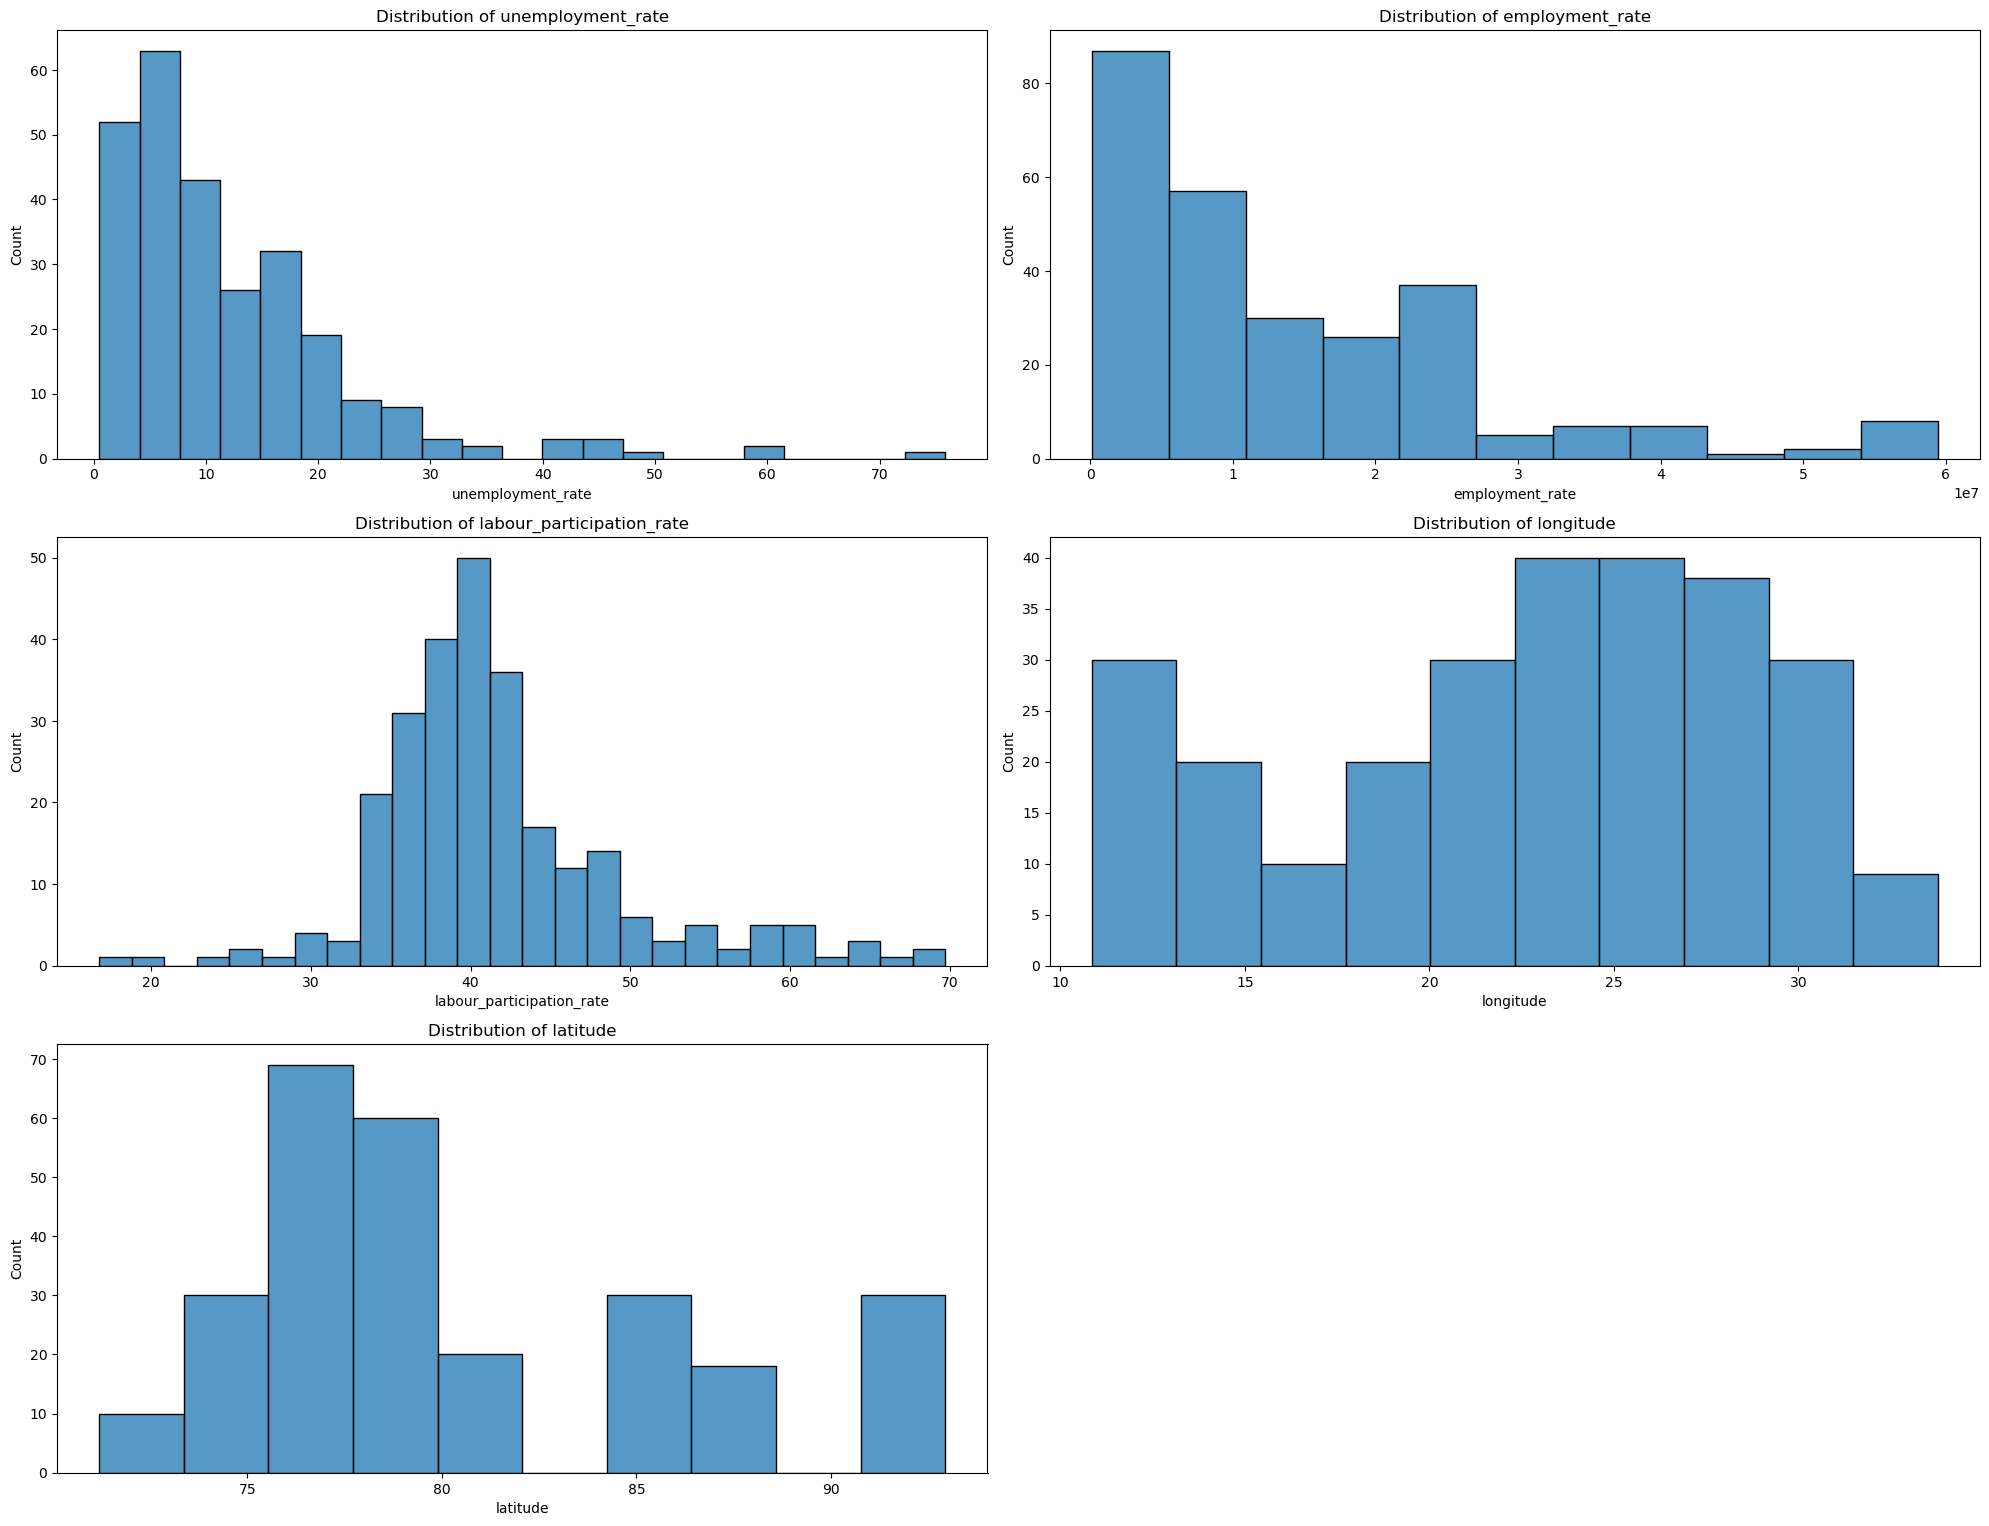

In [138]:
numeric_columns=data.select_dtypes('number')
plt.figure(figsize=(20,20))
for i , col in enumerate(numeric_columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data[col])
    plt.title('Distribution of '+col)
    plt.tight_layout()

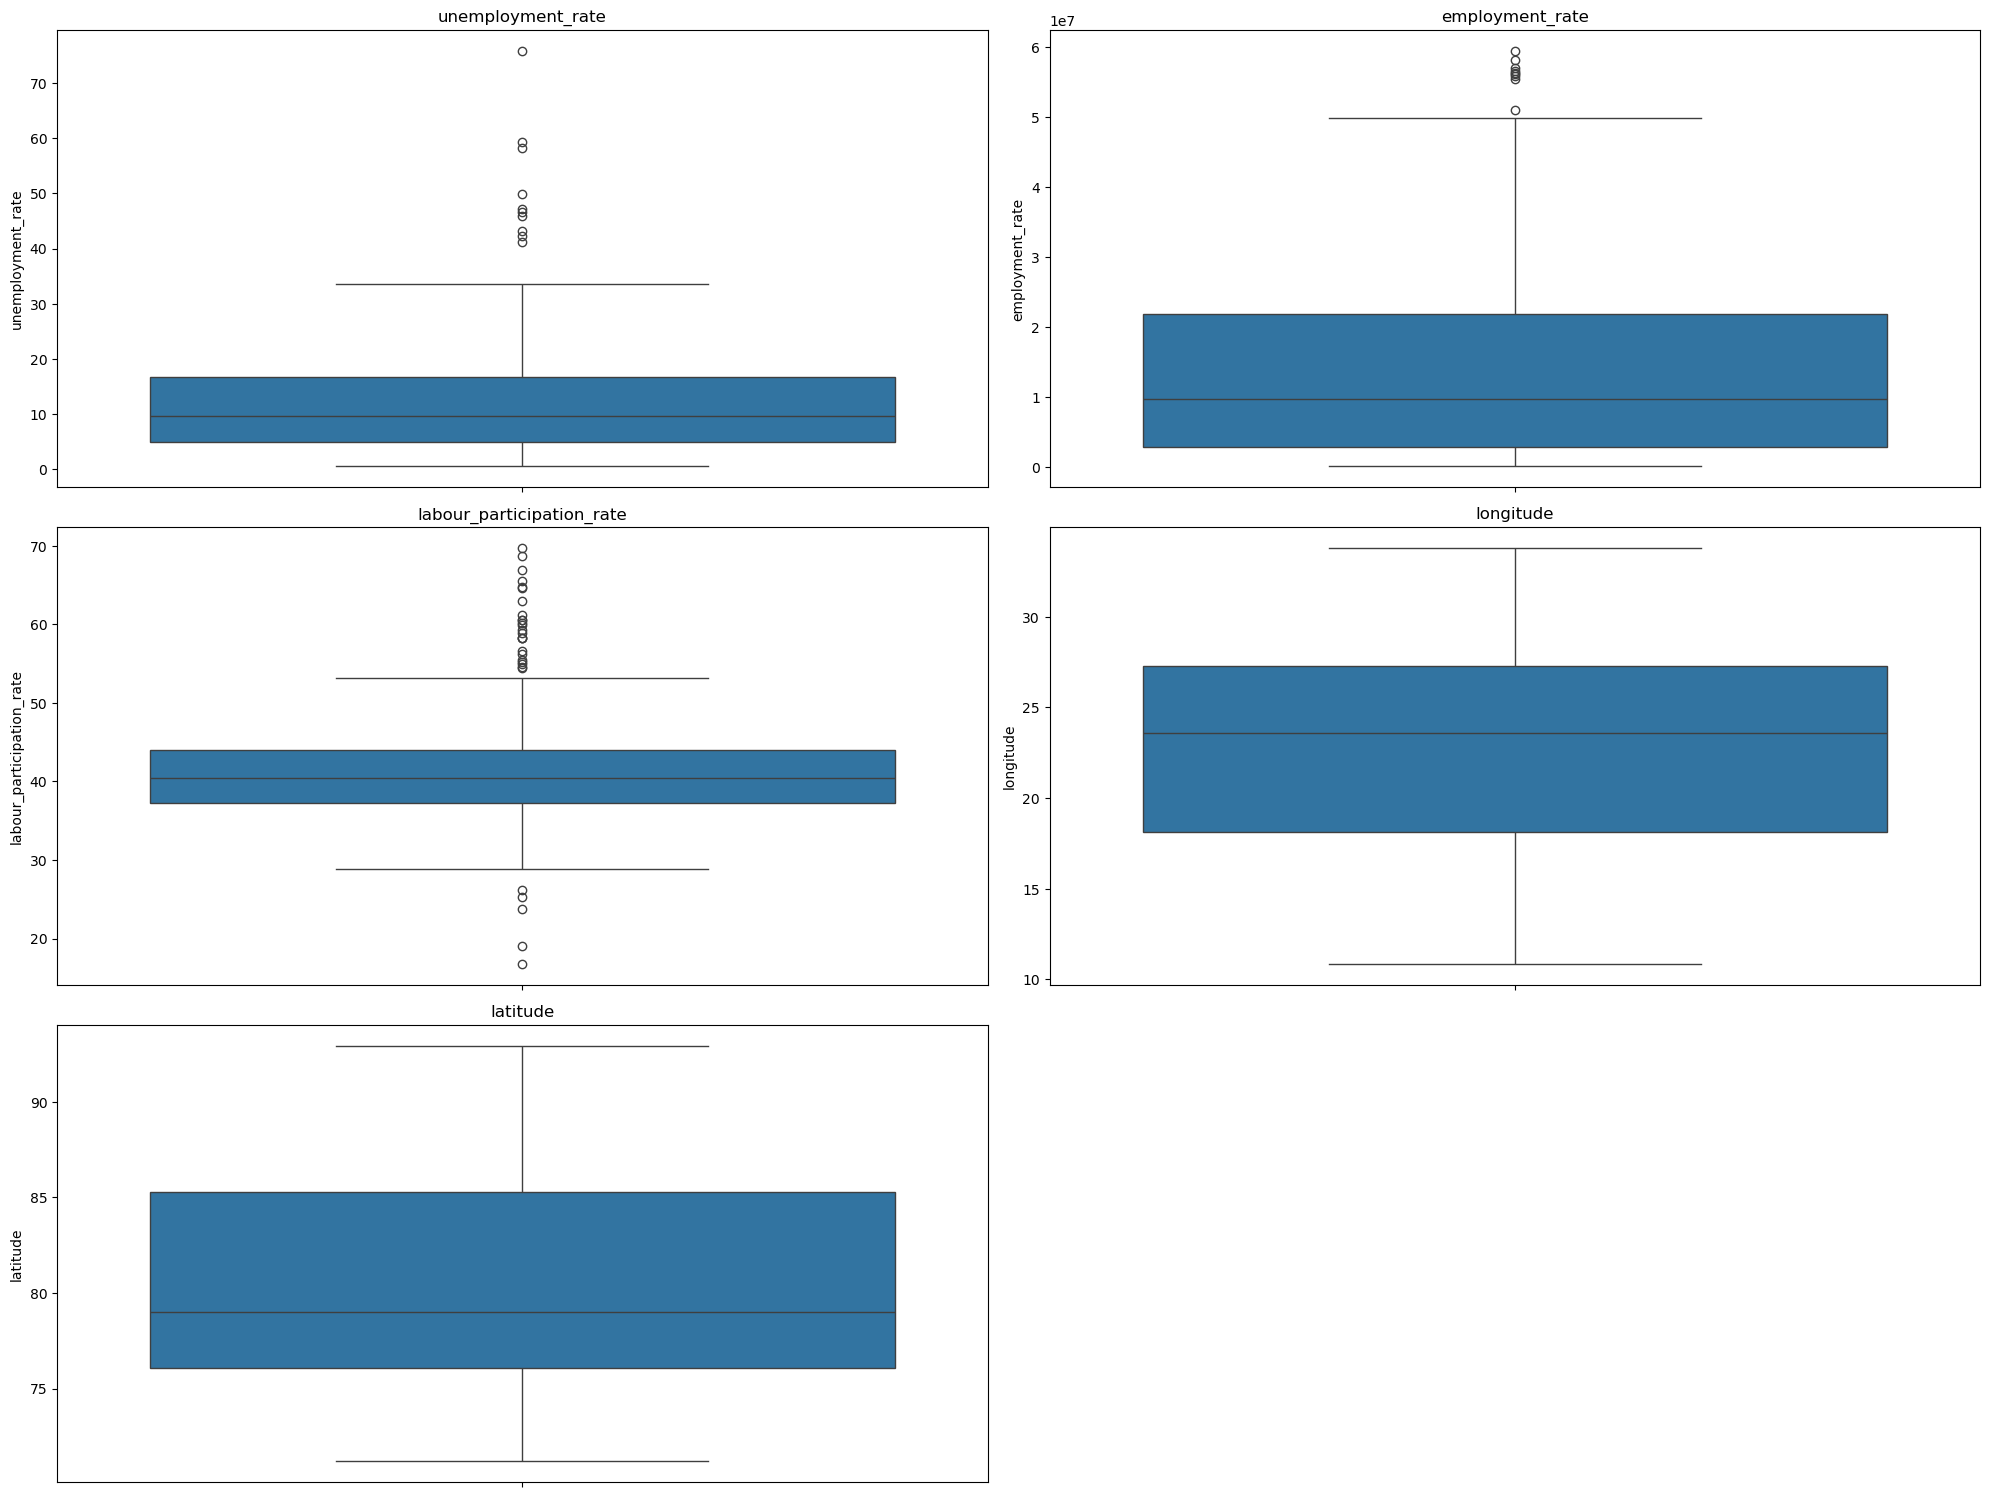

In [139]:
numeric_columns=data.select_dtypes('number')
plt.figure(figsize=(20,20))
for i , col in enumerate(numeric_columns):
    plt.subplot(4,2,i+1)
    sns.boxplot(data[col])
    plt.title(col)
    plt.tight_layout()

                                             2-Bivariate Analysis

In [134]:
data.columns

Index(['region', 'date', 'frequency', 'unemployment_rate', 'employment_rate',
       'labour_participation_rate', 'directions', 'longitude', 'latitude'],
      dtype='object')

Text(0.5, 1.0, 'Longitude vs. Latitude')

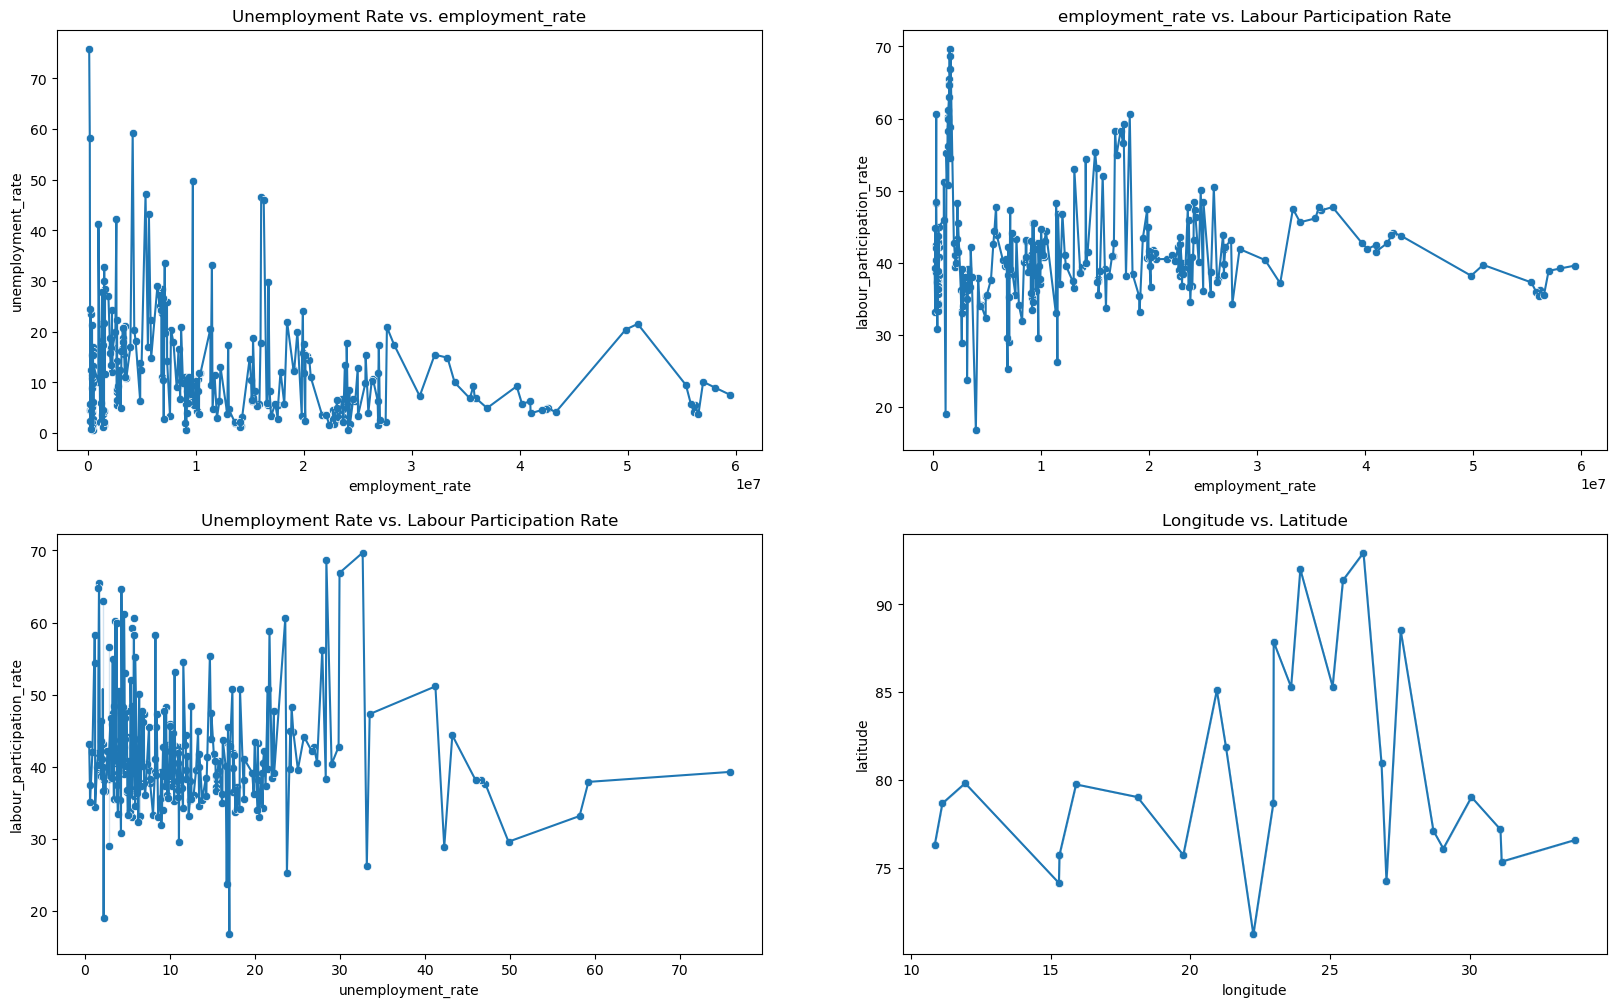

In [135]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.scatterplot(data=data,x='employment_rate',y='unemployment_rate')
sns.lineplot(data=data,x='employment_rate',y='unemployment_rate')
plt.title('Unemployment Rate vs. employment_rate')

plt.subplot(2, 2, 2)
sns.scatterplot(x='employment_rate', y='labour_participation_rate', data=data)
sns.lineplot(data=data,x='employment_rate',y='labour_participation_rate')
plt.title('employment_rate vs. Labour Participation Rate')

plt.subplot(2,2,3)
sns.scatterplot(data=data,x='unemployment_rate',y='labour_participation_rate')
sns.lineplot(data=data,x='unemployment_rate',y='labour_participation_rate')
plt.title('Unemployment Rate vs. Labour Participation Rate')

plt.subplot(2,2,4)
sns.scatterplot(data=data,x='longitude', y='latitude')
sns.lineplot(data=data,x='longitude', y='latitude')
plt.title('Longitude vs. Latitude')


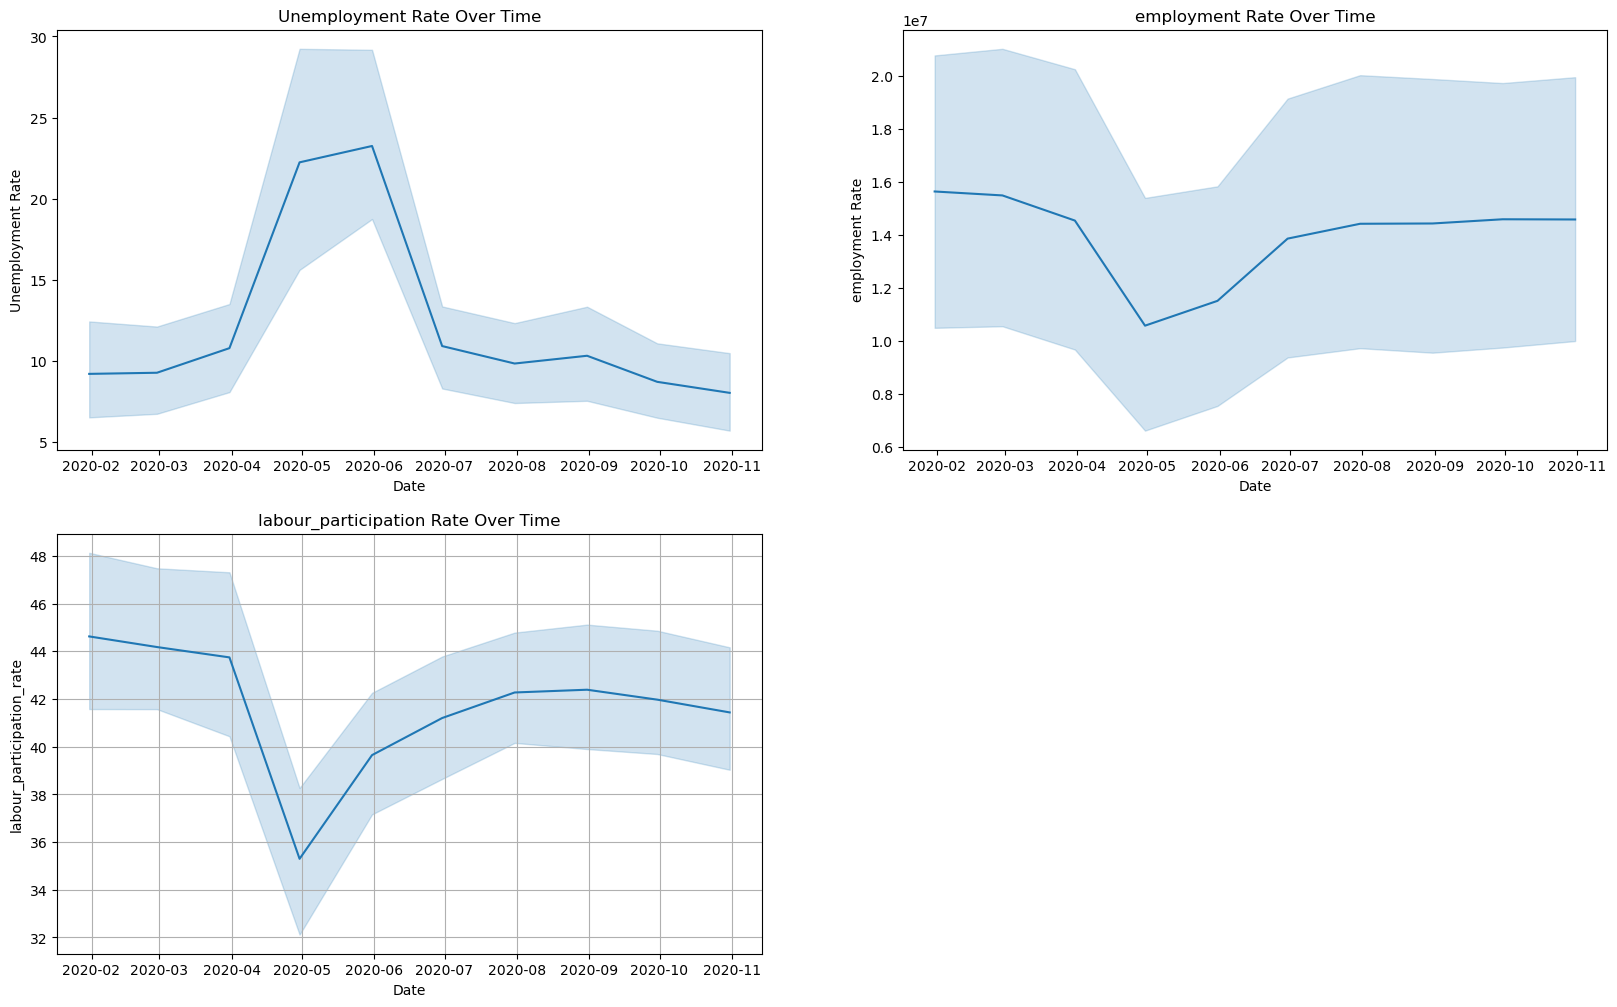

In [140]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.lineplot(x='date', y='unemployment_rate', data=data)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')

plt.subplot(2,2,2)
sns.lineplot(x='date', y='employment_rate', data=data)
plt.title('employment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('employment Rate')

plt.subplot(2,2,3)
sns.lineplot(x='date', y='labour_participation_rate', data=data)
plt.title('labour_participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('labour_participation_rate')


plt.grid(True)


In [154]:
data_corr=data[['unemployment_rate', 'employment_rate','labour_participation_rate', 'longitude', 'latitude']].corr()
data_corr

,unemployment_rate,employment_rate,labour_participation_rate,longitude,latitude
unemployment_rate,1.00,-0.25,-0.07,0.15,-0.02
employment_rate,-0.25,1.00,-0.05,-0.11,-0.12
labour_participation_rate,-0.07,-0.05,1.00,0.08,0.40
longitude,0.15,-0.11,0.08,1.00,0.13
latitude,-0.02,-0.12,0.40,0.13,1.00


 2- Numerical vs. Categorical 

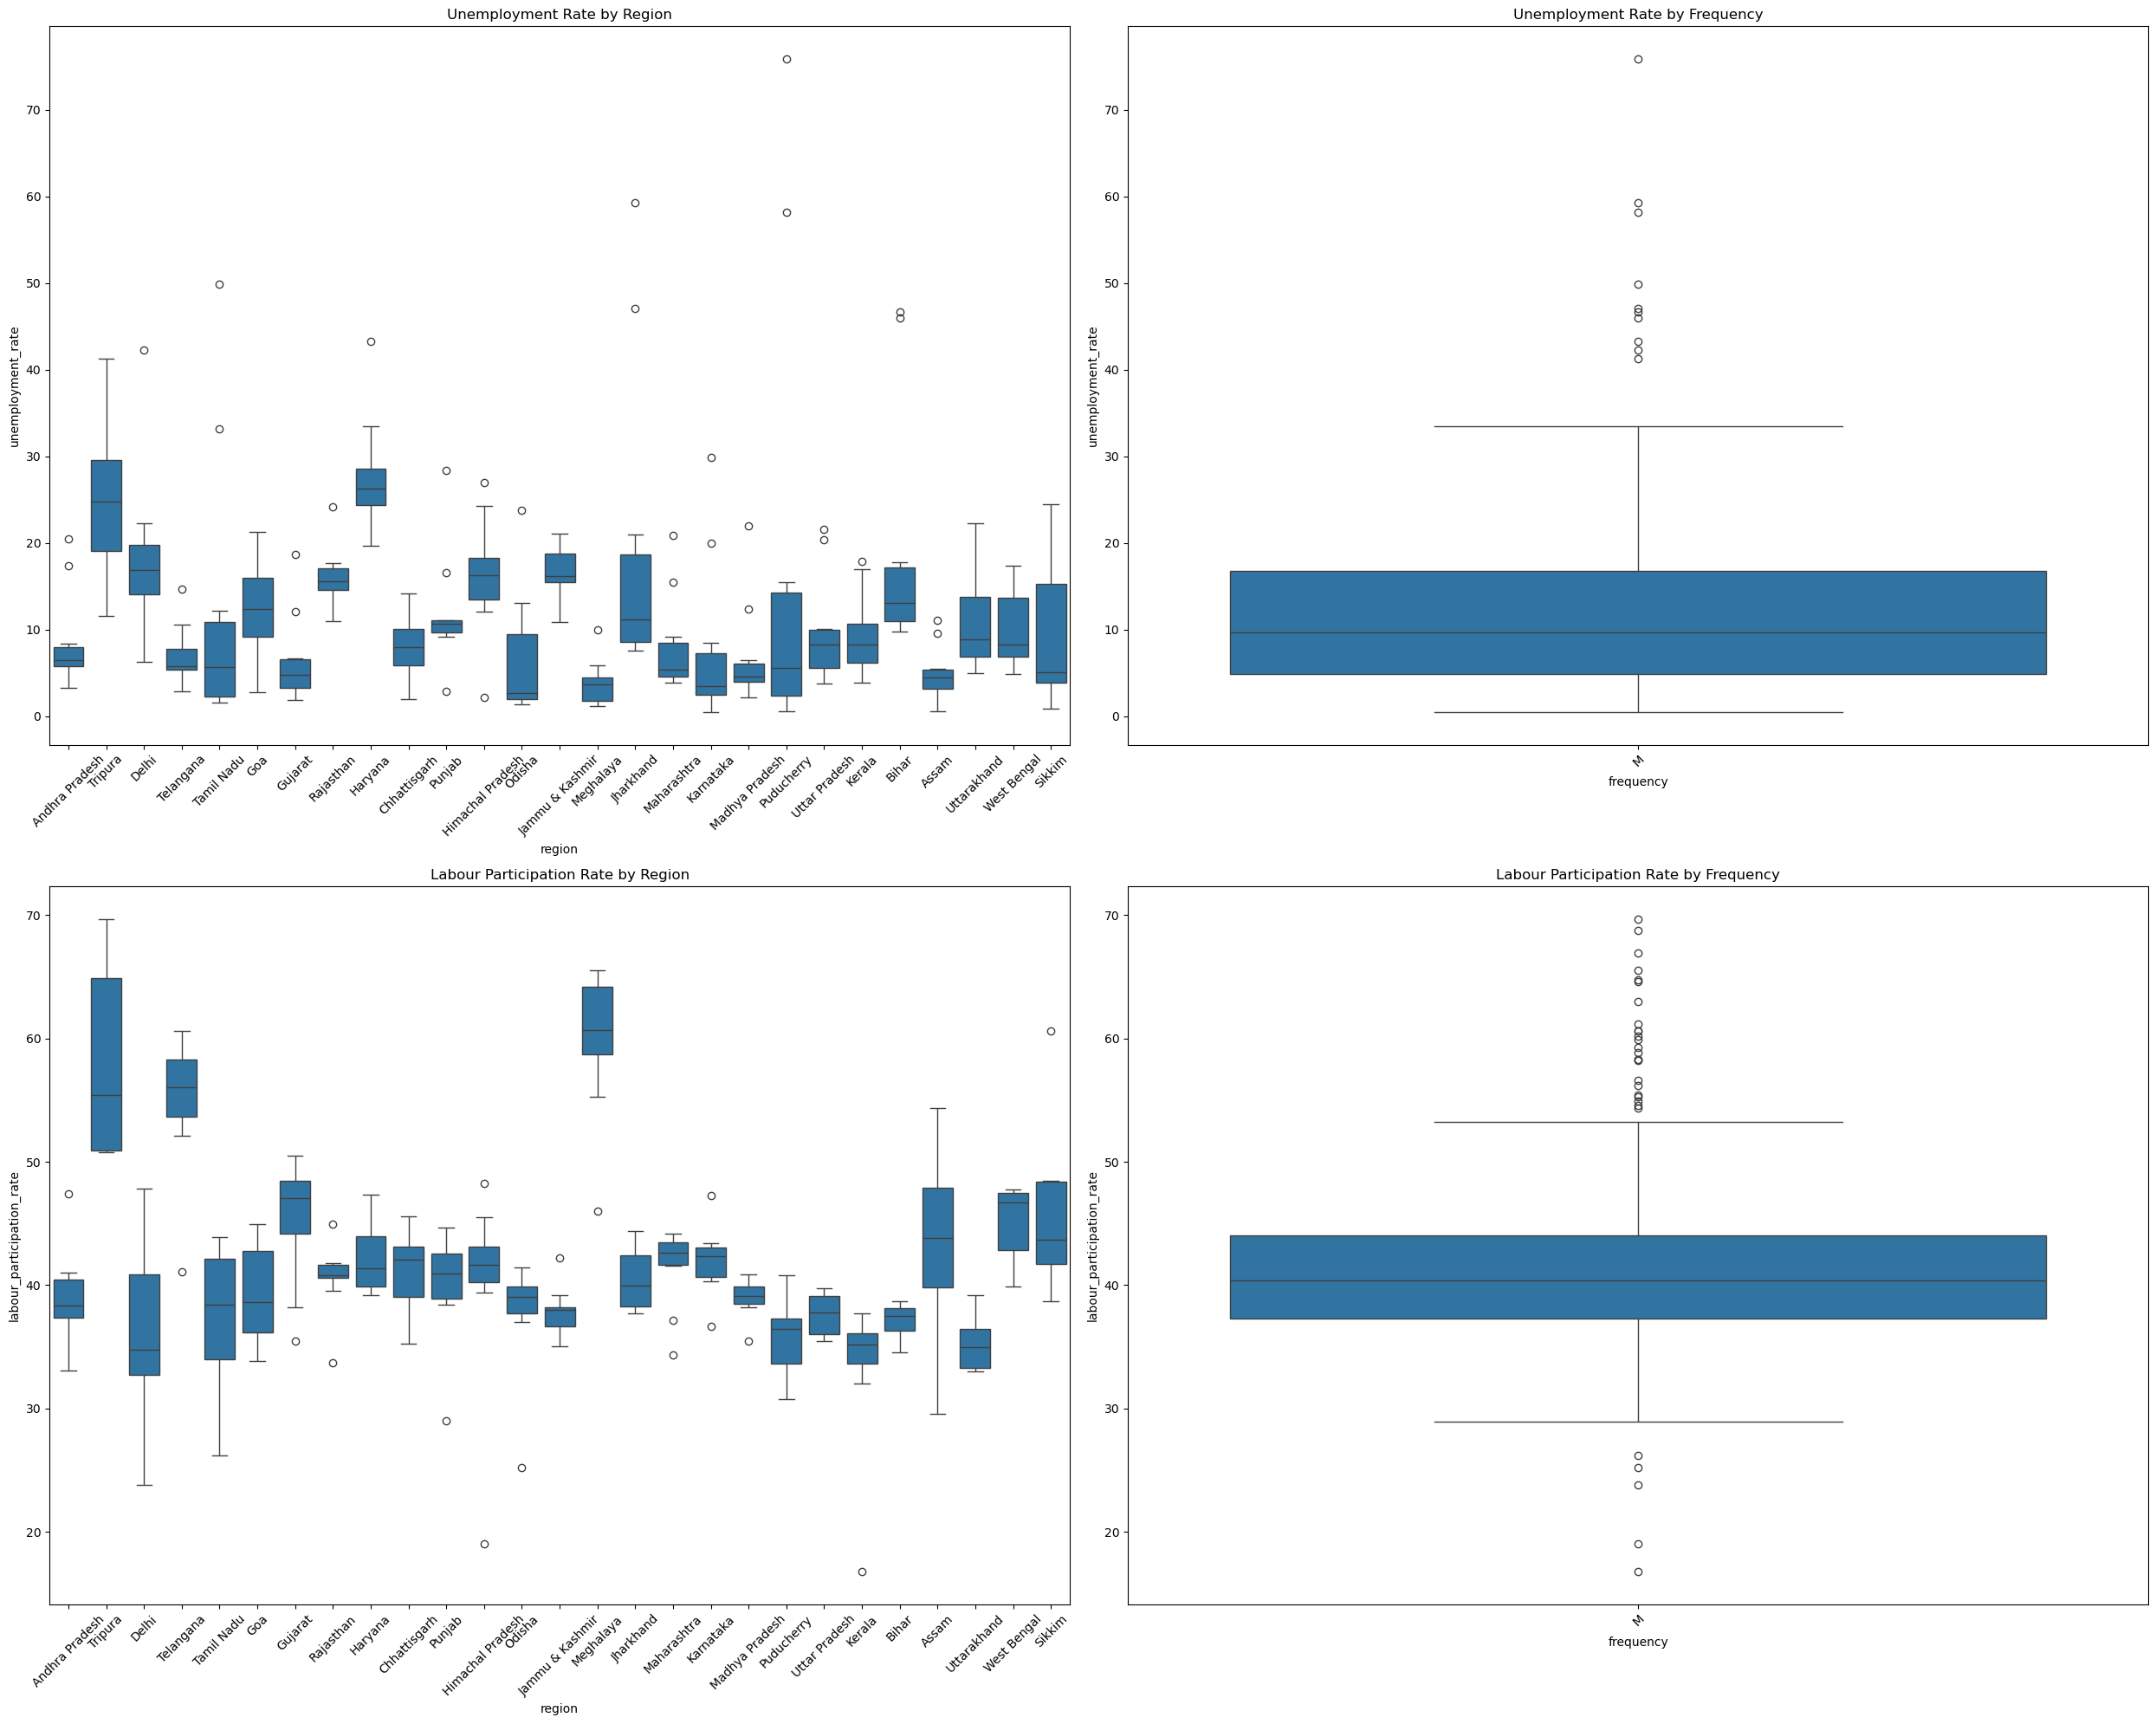

In [142]:
# Box plots for categorical vs numerical features
plt.figure(figsize=(25, 20))

plt.subplot(2, 2, 1)
sns.boxplot(x='region', y='unemployment_rate', data=data)
plt.title('Unemployment Rate by Region')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='frequency', y='unemployment_rate', data=data)
plt.title('Unemployment Rate by Frequency')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.boxplot(x='region', y='labour_participation_rate', data=data)
plt.title('Labour Participation Rate by Region')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.boxplot(x='frequency', y='labour_participation_rate', data=data)
plt.title('Labour Participation Rate by Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


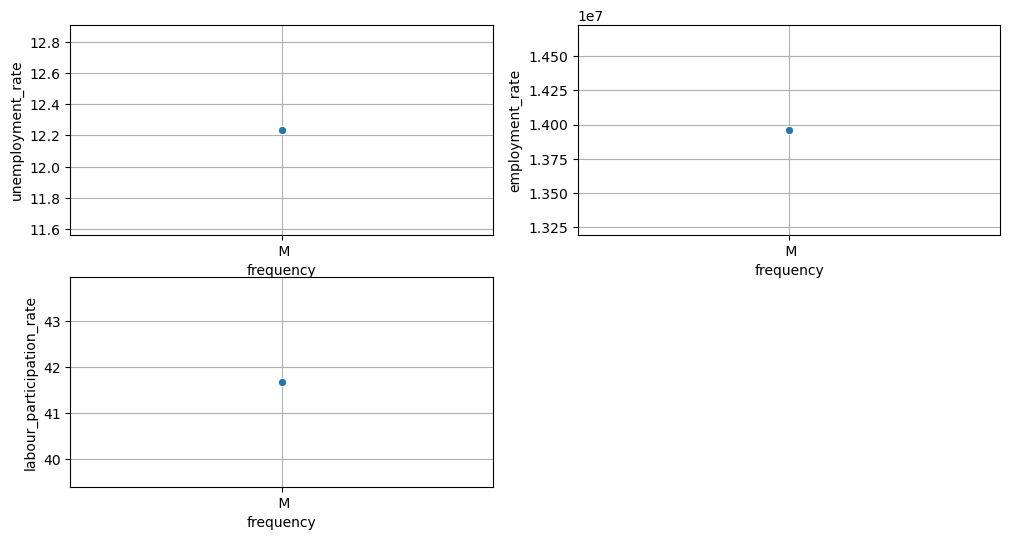

Frequency of Unemployment[[' M' 12.236928838951311]]
Frequency of employment[[' M' 13962105.722846443]]
Frequency of labour[[' M' 41.68157303370786]]


In [143]:
# Aggregate data by frequency and calculate the mean unemployment rate
frequency_unemployment = data.groupby('frequency')['unemployment_rate'].mean().reset_index()
frequency_employment = data.groupby('frequency')['employment_rate'].mean().reset_index()
frequency_labour = data.groupby('frequency')['labour_participation_rate'].mean().reset_index()

#sort data by frequency
frequency_unemployment = frequency_unemployment.sort_values('frequency')
frequency_employment = frequency_employment.sort_values('frequency')
frequency_labour = frequency_labour.sort_values('frequency')

plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
sns.lineplot(x='frequency', y='unemployment_rate', data=frequency_unemployment, marker='o')
plt.grid(True)

plt.subplot(2,2,2)
sns.lineplot(x='frequency', y='employment_rate', data=frequency_employment, marker='o')
plt.grid(True)

plt.subplot(2,2,3)
sns.lineplot(x='frequency', y='labour_participation_rate', data=frequency_labour, marker='o')
plt.grid(True)

plt.show()
print(f'Frequency of Unemployment{frequency_unemployment.values}')
print(f'Frequency of employment{frequency_employment.values}')
print(f'Frequency of labour{frequency_labour.values}')


3- Categorical vs. Categorical (Cross-tabulation - Stacked Bar Plot)

In [144]:
#directions vs region in plots
region_count_per_around = data.groupby(['directions', 'region']).size().reset_index(name='count')
fig = px.bar(region_count_per_around, 
             x='directions', 
             y='count', 
             color='region', 
             title='Count of Regions within Each Around Group',
             labels={'arounds': 'Arounds', 'count': 'Count', 'region': 'Region'},
             barmode='stack')  
fig.show()


In [145]:
#cross tab with directions vs region
cross_tab_region=pd.crosstab(data['region'],data['directions'])
cross_tab_region.head()

directions,East,North,Northeast,South,West
region,,,,,
Andhra Pradesh,0,0,0,10,0
Assam,0,0,10,0,0
Bihar,10,0,0,0,0
Chhattisgarh,0,0,0,0,10
Delhi,0,10,0,0,0


                                               3- Multivariate Analysis

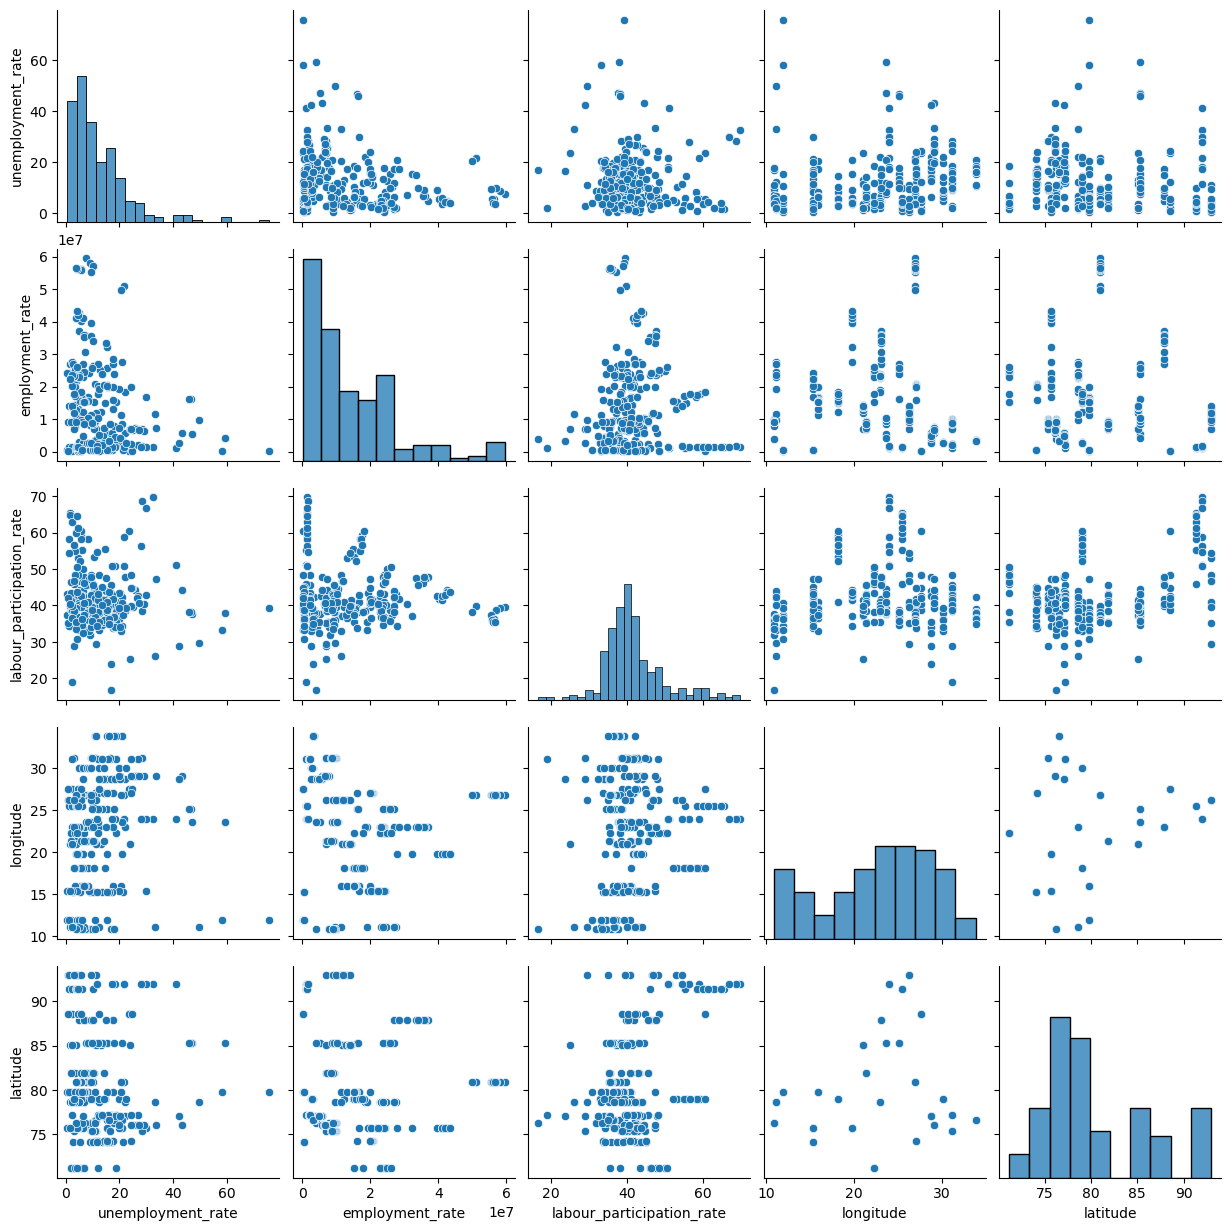

In [150]:
# Pair plots for numerical features
sns.pairplot(data[['unemployment_rate', 'employment_rate', 'labour_participation_rate', 'longitude', 'latitude']])
plt.show()


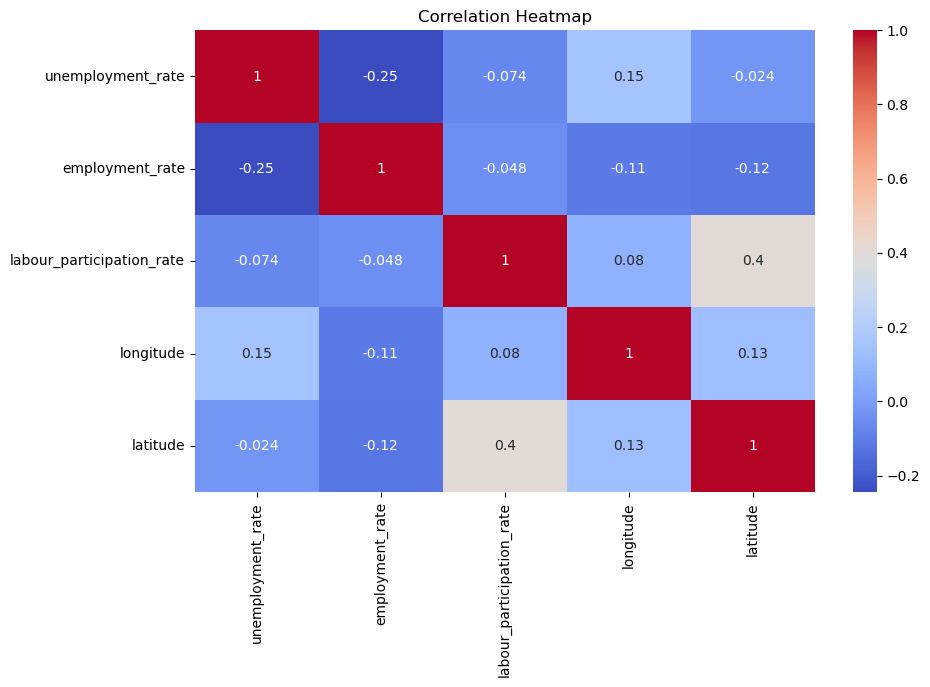

In [153]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
